#**EE769 Introduction to Machine Learning**

#Assignment 1: Gradient Descent, Linear Regression, and Regularization


**Template and Instructions**



1. Up to two people can team up, but only one should submit, and both should understand the entire code.
2. Every line of code should end in a comment explaining the line
3. It is recommended to solve the assignment in Google Colab.
Write your roll no.s separated by commas here: 213230011, 213350005
4. Write your names here: Sayan Ray, Ashish Patel
5. There are two parts to the assignment. In the Part 1, the code format has to be strictly followed to enable auto-grading. In the second part, you can be creative.
6. **You can discuss with other groups or refer to the internet without being penalized, but you cannot copy their code and modify it. Write every line of code and comment on your own.**

#**Part 1 begins ...**
**Instructions to be strictly followed:**

1. Do not add any code cells or markdown cells until the end of this part. Especially, do not change the blocks that say "TEST CASES, DO NOT CHANGE"
2. In all other cells only add code where it says "CODE HERE".
3. If you encounter any raise NotImplementedError() calls you may comment them out.

We cannot ensure correct grading if you change anything else, and you may be penalised for not following these instructions.

## Import Statements

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#Importing the packages of numpy, pandas and matplotlib

## Normalize function



We normalize by subtracting the mean from the data and dividing that with the standard deviation.
Now the coloumn of the data matrix X are all same kind of data recorded in different times or situations, so finding the mean and normalizing has tot be done coloumnwise.


In [ ]:
def Normalize(X): # Output should be a normalized data matrix of the same dimension
    '''
    Normalize all columns of X using mean and standard deviation
    '''
    # By using the mean() of numpy package and setting the axis to 0 we can calculate the coloumnwise mean.
    # By using the std() of numpy package and setting the axis to 0 we are calculating the coloumnwise standard deviation.
    # Now subtracting mean from the actual matrix X and dividing it with the standard deviation we are obtaining the normalized

    norX = (X - np.mean(X,axis=0)) / (np.std(X,axis=0))
    return norX

    #raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - 1 dimensional array'''
#X=np.array([[1,2,3],[3,4,5],[7,8,9]])
X1=np.array([1,2,3])
np.testing.assert_array_almost_equal(Normalize(X1),np.array([-1.224,  0.      ,  1.224]),decimal=3)
''' case 2 - 2 dimensional array'''
X2=np.array([[4,7,6],[3,8,9],[5,11,10]])
np.testing.assert_array_almost_equal(Normalize(X2),np.array([[ 0.  , -0.980581, -1.372813],[-1.224745, -0.392232,  0.392232],[ 1.224745,  1.372813,  0.980581]]))
''' case 3 - 1 dimensional array with float'''
X3=np.array([5.5,6.7,3.2,6.7])
np.testing.assert_array_almost_equal(Normalize(X3),np.array([-0.017,  0.822, -1.627,  0.822]),decimal=3)

## Prediction Function

Given X and w, compute the predicted output. Do not forget to add 1's in X

In [ ]:
def Prediction (X, w): # Output should be a prediction vector y
    '''
    Compute Prediction given an input datamatrix X and weight vecor w. Output y = [X 1]w where 1 is a vector of all 1s
    '''
    # Generating the extra coloumns of 1's to take care of the bias terms in weight array and attaching it at te end of X (data) matrix.
    p = np.ones(len(X))
    X = np.c_[X,p]

    # And thus by multiplying the data and weights we get our prediction.
    y = np.dot(X,w)
    return y

    #raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - Known input output matrix and weights 1'''
X1 = np.array([[3,2],[1,1]])
w1 = np.array([2,1,1])
np.testing.assert_array_equal(Prediction(X1,w1),np.array([9,4]))


## Loss Functions

Code the four  loss functions:

1. MSE loss is only for the error
2. MAE loss is only for the error
3. L2 loss is for MSE and L2 regularization, and can call MSE loss
4. L1 loss is for MSE and L1 regularization, and can call MSE loss

MSE loss or Mean Square Error Loss, as the name suggests its the Mean of the sum of square of individual errors. That is:

(1/n)*Σ(t-y)^2  

(n being the total number of y or t terms)

In [ ]:
def MSE_Loss (X, t, w, lamda =0): # Ouput should be a single number
    '''
    lamda=0 is a default argument to prevent errors if you pass lamda to a function that doesn't need it by mistake.
    This allows us to call all loss functions with the same input format.

    You are encouraged read about default arguments by yourself online if you're not familiar.
    '''
    # Firstly we need to generate the output that is predicted with the given Data and weights.
    y = Prediction (X, w)

    # Now simply we find the difference (t - y) and square it using the square() and their mean using mean()
    MseLoss = np.mean(np.square(np.subtract(t,y)))
    return MseLoss

    #raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(MSE_Loss(X,t,w),0.53,decimal=3)


MAE loss or Mean Absoloute Error Loss, as the name suggests its the Mean of the sum of absoloute values of individual errors. That is:

(1/n)*Σ|(t-y)|  

(n being the total number of y or t terms)

In [ ]:
def MAE_Loss (X, t, w, lamda = 0): # Output should be a single number

    # Firstly we need to generate the output that is predicted with the given Data and weights.
    y = Prediction (X, w)

    # Now simply we find the difference (t - y) and compute its absoloute it using the abs() and their mean using mean()
    MaeLoss = np.mean(np.abs(np.subtract(t,y)))
    return MaeLoss

    #raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(MAE_Loss(X,t,w),0.700,decimal=3)


L2 loss is Mean Square Error Loss + L2 regularization, so we compute the Mean of the sum of square of individual errors along with that we use an additional term λΣw^2 That is:

(1/n)*Σ(t-y)^2 + λΣw^2  

(n being the total number of y or t terms)

In [ ]:
def L2_Loss (X, t, w, lamda): # Output should be a single number based on L2-norm (with sqrt)
    ''' Need to specify what inputs are'''
    # Firstly we need to find the MSE loss for the generated output using the given Data and weights.
    MseLoss = MSE_Loss (X, t, w, lamda)

    # Now a thing to keep in mind, we are to exclude the bias term to compute regulation so a new weights array is generated with the bias term removed.
    w_ac = np.delete(w, -1)

    # According to the formula computing the regulization
    reg = lamda * np.sqrt(np.sum(np.square(w_ac)))

    # Finally the L2 loss
    L2loss = MseLoss + reg
    return L2loss
    #raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(L2_Loss(X,t,w,0.5),1.675,decimal=3)


L1 loss is Mean Square Error Loss + L1 regularization, so we compute the Mean of the sum of square of individual errors along with that we use an additional term λΣ|w| That is:

(1/n)*Σ(t-y)^2 + λΣ|w|

(n being the total number of y or t terms)

In [ ]:
def L1_Loss (X, t, w, lamda): # Output should be a single number

    # Firstly we need to find the MSE loss for the generated output using the given Data and weights.
    MseLoss = MSE_Loss (X, t, w, lamda)

    # Excluding the bias term to compute regulation so a new weights array is generated with the bias term removed.
    w_ac = np.delete(w, -1)

    # According to the formula computing the regulization
    reg = lamda * np.sum(np.abs(w_ac))

    # Finally the L1 loss
    L1loss = MseLoss + reg
    return L1loss
    #raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(L1_Loss(X,t,w,0.5),2.280,decimal=3)


NRMSE of Normalized Root Mean Square Error as the name suggests is the normalized RMSE. And to Normalize we are going to divide using the standard deviation of the target.

In [ ]:
def NRMSE_Metric (X, t, w, lamda=0): # Output should be a single number. RMSE/std_dev(t)

    # First we are computing the RMSE for the given Data weigths and lambda.
    rmse = np.sqrt(MSE_Loss (X, t, w, lamda =0))

    # The standard deviation of the elements of t as given in the formula beside the method definition.
    stdev = np.std(t)

    # Computing the NRMSE
    nrmse = rmse / stdev
    return nrmse

    #raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' Test case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(NRMSE_Metric(X,t,w,0.5),0.970,decimal=3)


## Gradient function
Each Loss function will have its own gradient function:

1. MSE gradient is only for the error
2. MAE gradient is only for the error
3. L2 gradient is for MSE and L2 regularization, and can call MSE gradient
4. L1 gradient is for MSE and L1 regularization, and can call MSE gradient

The Gradient of a prediction model is obtained by differentiating the loss function w.r.t. the

In [ ]:
def MSE_Gradient (X, t, w, lamda=0): # Output should have the same size as w
    # YOUR CODE HERE

    # Now adding the extra columns of 1s in the Data matrix and using that and the weights prepare a prediction
    p = np.ones(len(X))
    X = np.c_[X,p]
    y = np.dot(X,w)

    # Computing the error array by subtracting the prediction and target
    err = y - t

    # Just to properly multipy the data Matrix we prepare a transpose matrix
    Xt = np.transpose(X)

    # Finally the Gradient
    MseGrad = np.dot(Xt,err)
    return MseGrad
    #raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(MSE_Gradient(X,t,w),np.array([2.55, 2.94, 2.9 , 0.4 ]),decimal=3)


In [ ]:
def MAE_Gradient (X, t, w, lamda=0): # Output should have the same size as w
    # YOUR CODE HERE

    # Adding the extra columns of 1s in the Data matrix and using that and the weights prepare a prediction
    p = np.ones(len(X))
    X = np.c_[X,p]
    y = np.dot(X,w)

    # Computing the absolute error array by subtracting the prediction and target and using abs()
    err = y - t
    absErr = np.abs(err)

    # Now for our case we are not compensating 0.5 so we have to multiply it seperately
    absMat = 0.5 * (err / absErr)

    # Just to properly multipy the data Matrix we prepare a transpose matrix
    Xt = np.transpose(X)

    # Finally the Gradient
    MaeGrad = np.dot(Xt,absMat)
    return MaeGrad
    #raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(MAE_Gradient(X,t,w),np.array([0.75,  0.3 ,  0.5 , 0.]),decimal=3)


In [ ]:
def L2_Gradient (X, t, w, lamda): # Output should have the same size as w
    # YOUR CODE HERE

    # We are simply calculating the MSE gradient by directly using the functions defined above
    MseGrad = MSE_Gradient (X, t, w, lamda)

    # Now this manuvre done here is to ensure that the bias term is not taken during regularization
    # But this is only ok for L2 since each element is going to be divided by norm of w so no chance of dividing by 0
    w[-1] = 0
    norm_w = ( np.sum(np.square(w)) )**0.5

    # Thus now calculating the regulation for the gradient
    regu = lamda * (w/norm_w)

    #finally the L2 gradient
    L2Grad = MseGrad + regu
    return (L2Grad)
    #raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(L2_Gradient(X,t,w,0.5),np.array([2.986, 2.721, 3.009 , 0.4 ]),decimal=3)


In [ ]:
def L1_Gradient (X, t, w, lamda): # Output should have the same size as w
    # YOUR CODE HERE

    # Calculating the MSE gradient by directly using the functions defined before.
    MseGrad = MSE_Gradient (X, t, w, lamda)

    # According to the formula we have to divide each w with their absoloute value thus we comute those values.
    # One thing to keep in mind is that these divisors cannot be 0, this has to be ensured during training.
    abs_w = np.abs(w)

    # Now we simply compute the regularization.
    regu = lamda * (w/abs_w)

    # Making the bias term as 0 so as to keep it out of computation.
    regu[-1] = 0

    # Computing the L1 gradient
    L1Grad = MseGrad + regu
    return (L1Grad)
    #raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(L1_Gradient(X,t,w,0.5),np.array([3.05, 2.44, 3.4 , 0.4 ]),decimal=3)


## Gradient Descent Function


In [ ]:
def Gradient_Descent (X, X_val, t, t_val, w, lamda, max_iter, epsilon, lr, lossfunc, gradfunc): # See output format in 'return' statement

    # Now we simply try to adjust the value of w based on gradient descent with then given loss and gradient function.
    # So my aim is to keep optimizing the value of w based on a fixed lamda on the training set until the change loss is less than epsilon.

    #to compare the previous loss for an un-updated w and the present updated w in every iteration.
    prev_cost = 0

    # we keep iterating until we iterate max_iter times.
    for i in range(max_iter):
        curr_cost = lossfunc (X, t, w, lamda) #calculating the loss for a current w
        if (abs(prev_cost - curr_cost)<=epsilon):
            break # If the difference between consecutive losses are almost the same then we brak out

        # If change in loss is still more then epsilon we update the weights using gradent descent
        w = w - (lr * gradfunc(X, t, w, lamda))
        prev_cost = curr_cost


    # so now we have the best set of trainied weights we put them in to the w_final variable and compute the final training and vaildation losses
    # Mind you these losses are are MSE not RMSE
    w_final = w

    # The training loss has to be computed on the training dataset and training target, based on a particular lambda
    train_loss_final = lossfunc(X, t, w_final, lamda)

    # The validation loss has to be computed on the validation dataset and validation target, based on a particular lambda
    validation_loss_final = lossfunc(X_val, t_val, w_final, lamda)

    # The validation NRMSE has to be computed on the validation dataset and Validation target using the NRMSE_Metric function, based on a particular lambda
    validation_NRMSE = NRMSE_Metric (X_val, t_val, w_final, lamda)

    #raise NotImplementedError()
    return w_final, train_loss_final, validation_loss_final, validation_NRMSE #You should return variables structured like this.


In [ ]:

'''
TEST CASES, DO NOT CHANGE
'''
X=np.array([[23,24],[1,2]])
t=np.array([4,5])
X_val=np.array([[3,4],[5,6]])
t_val=np.array([3,4])
w=np.array([3,2,1])
results =Gradient_Descent (X, X_val, t, t_val, w, 0.1, 100, 1e-10, 1e-5, L2_Loss,L2_Gradient)
np.testing.assert_allclose([results[1]],[697.919],rtol =0.05)
np.testing.assert_allclose([results[2]],[20],atol=5) # we expect around 17.5  but some students got 24 which we will also accept
#Instructor Values of results[1] and results [2] are 697.919 and 17.512 respectively

## Pseudo Inverse Method

You have to implement a slightly more advanced version, with L2 penalty:

w = (X' X + lambda I)^(-1) X' t.

See, for example: Section 2 of https://web.mit.edu/zoya/www/linearRegression.pdf

Here, the column of 1's in assumed to be included in X

**In this method I am using the given formula**:

w = (X' X + lambda I)^(-1) X' t

I am going to denote X' X as A

And denoting: (X' X + lambda I) as B

In [ ]:
def Pseudo_Inverse (X, t, lamda): # Output should be weight vector
    # YOUR CODE HERE

    # Adding the coloumn of 1s for bias terms
    p = np.ones(len(X))
    X = np.c_[X,p]

    # The transpose of the dataset
    Xt = np.transpose(X)

    # The X'X matrix
    A = np.dot(Xt,X)

    # To form the Identity matrix we need the dimension of X'X
    n = len(A)
    I = np.identity(n, dtype = float)

    # Computing (X' X + lambda I)
    B = np.linalg.inv(A + (lamda*I))

    # Finally the weights array is this
    w = np.dot(np.dot(B,Xt),t)
    return (w)
    #raise NotImplementedError() a)

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - other data'''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
np.testing.assert_array_almost_equal(Pseudo_Inverse(X,t,0.5),np.array([ 0.491,  0.183,  0.319, -0.002]),decimal=3)

#... Part 1 ends Below this you be more creative. Just comment out the lines where you save files (e.g. test predictions).

#**Part 2 begins ...**

**Instructions to be loosely followed (except number 8):**

1. Add more code and text cells between this and the last cell.
2. Read training data from: https://www.ee.iitb.ac.in/~asethi/Dump/TempTrain.csv only. Do not use a local copy of the dataset.
3. Find the best lamda for **MSE+lamda*L2(w)** loss function. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.
4. Find the best lamda for **MSE+lamda*L1(w)** loss function. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.
5. Find the best lamda for the **pseudo-inv method**. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.
6. Plot a predicted vs. actual plot for the validation data for the best model, and compute its R^2.
7. Write your observations and conclusions.
8. Read test data from: https://www.ee.iitb.ac.in/~asethi/Dump/TempTest.csv only. Do not use a local copy of the dataset. Predict its dependent (missing last column) using the model with the lowest MSE, RMSE, or NRMSE. Save it as a file RollNo1_RollNo2_1.csv.
9. **Disable the prediction csv file saving statement and submit this entire .ipynb file, .py file, and .csv file as a single RollNo1_RollNo2_1.zip file.**


Before starting this I would highly advise the user to run the cells from top to bottom, as there are variable declarations that might affect the code if the oreder is not maintained. Thank You


**The training set is in :** https://www.ee.iitb.ac.in/~asethi/Dump/TempTrain.csv

In [ ]:
import numpy as np
import pandas as pd
import math as mt
# I am importing these again in case only this section is run and the one on top is not.
# Opening this csv file required this and google colab did not have this so installing it seperately
!pip install fsspec

url_path = "https://www.ee.iitb.ac.in/~asethi/Dump/TempTrain.csv"
df = pd.read_csv( url_path )

#now that we have the data frame I am convertin it to a numpy matrix.
arr = df.to_numpy()

arr_norm = Normalize(arr) # normalizing, as the differences in the data might cause problems.
np.random.shuffle(arr_norm) # shuffle.

# splitting into Training and Validation sets.
t_set = arr_norm[:,-1]
X_set = arr_norm[:,0:-1]

# Selecting 80% of the dataset as training data and 20% as validation data.

# Validation data will be 20% so declaring that particular point.
val_len = int(0.2 * len(t_set))

# Taking 20% off the total data from the top (index 0 to 20% point) for valiaton purpose.
t_val = t_set[0:val_len]
X_val = X_set[0:val_len,:] # we are specifying the rows and taing all coloumns

# Data from that 20% point till the end goes to model Training.
t = t_set[val_len:len(t_set)]
X = X_set[val_len:len(t_set),:] # we are specifying the rows and taing all coloumns

# Now these variables will help us later on when we compare model superiority
# The err_<model> variables store the NRMSE errors of each model
err_L2 = 0
err_L1 = 0
err_PI = 0
# The w_<model> variables store the weights for best lambda of each model
w_L2 = []
w_L1 = []
w_PI = []

# To store the best model parameters out of the three
bestModel_w = []

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 141 kB 4.9 MB/s 


Finding the best lamda for **MSE+lamda*L2(w)** loss function i.e. L2 loss function.

Plotting the training and validation RMSE vs. 1/lamda.

Printing weights, validation RMSE, validation NRMSE for the best lamda.

In [ ]:
def bestLamL2 ():

  # So that the global variables can be modified we need to declare them global.
  global err_L2
  global w_L2

  # So we are to find a particular λ
  # Before that we have to have a particular starting weights array it can be anything but has to be initialized.
  sh = X.shape
  w = np.random.randint(-5,5,sh[1])

  # Adding that bias temrm by adding a coloumn of 1s
  w = np.append(w,1)

  # These lists are to plot the required graphs
  lamInv = []  # Complexity
  tr_loss = [] # Training loss
  val_loss = []# Validation loss

  # I am using the same values as used to verify the gradient descent function's correctness
  epsilon = 1e-10
  max_iter = 100
  lr = 1e-5

  # I have observed that generally the error changes very less for higher values of complexity
  # Thus I am considering plotting for complexities in the range of 0.1 to 40 as it captures the required parts
  lamda = 10.0

  # I am running the values of lambda in reverse so that the curve is plotted in increasing order of complexity
  while (lamda >= 0.025):

    # The gradient descent method gives the losses directly so using that
    resultsL2 = Gradient_Descent (X, X_val, t, t_val, w, lamda, max_iter, epsilon, lr, L2_Loss,L2_Gradient)

    # Appending the losses to the respective lists
    tr_loss = np.append(tr_loss,resultsL2[1])
    val_loss = np.append(val_loss,resultsL2[2])
    lamInv = np.append(lamInv,(1/lamda))
    lamda = lamda - 0.001

  # Converting all the MSE losses to RMSE losses
  tr_loss = np.sqrt(tr_loss)
  val_loss = np.sqrt(val_loss)

  # Now where to stop as the lowest value is better and better for increasing complexity
  # Thus if the value is within 5% of its decay we are selecting that value
  min_lim = min(val_loss)
  max_lim = max(val_loss)

  # tolerance stores the value at which we get the best lambda
  tolerance = 0.05* (max_lim - min_lim) + min_lim

  # c serves as the element index in the respective lists, to locate the best lambda
  c = 0

  # So now we go through the validation losses and select the first lambda that indicates the 95% decay of the loss
  for i in val_loss :
    if (i <= tolerance):
      break
    c = c + 1

  # So the best lambda is found out by inverting the complexiy (in lamInv list) at index c
  best_lamda = 1/lamInv[c]

  # Using the gradient descent function one last time to get the best set of weights
  finalL2 = Gradient_Descent (X, X_val, t, t_val, w, best_lamda, max_iter, epsilon, lr, L2_Loss,L2_Gradient)
  # Now displaying them
  print ("Best Lamda ", str(best_lamda))
  print()
  print ("Weights ", str(finalL2[0]))
  print()
  print ("Validation RMSE Loss ", str(val_loss[c]))
  print()
  print ("Validation NRMSE Loss ", str(finalL2[3]))
  print()

  #storing the comparison parameters
  err_L2 = finalL2[3]
  w_L2 = finalL2[0]

  # Plotting the graphs with a mark on the best lambda
  plt.plot(lamInv[c], tr_loss[c], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red",label="Best Lambda")
  plt.plot (lamInv,tr_loss)
  plt.xlabel("1/λ")
  plt.ylabel("Training RMSE Loss")
  plt.legend()
  plt.show()

  plt.plot(lamInv[c], val_loss[c], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red",label="Best Lambda")
  plt.plot (lamInv, val_loss)
  plt.xlabel("1/λ")
  plt.ylabel("Validation RMSE Loss")
  plt.legend()
  plt.show()

Best Lamda  0.2530000000001028

Weights  [-1.23880314e+00  2.15281916e+00 -1.50293033e+00 -5.60091154e-01
 -1.12160082e+00  4.78277919e-01 -4.27067506e-01  7.12889390e-01
 -1.18320271e+00  5.59539089e-01  1.08405912e+00 -8.81424375e-01
  1.71300348e-01 -2.51236990e-02 -6.07349003e-02  7.60535656e-02
  2.98409624e-01 -1.36707406e-02  1.15595519e+00 -8.54861713e-01
  4.25020417e-01 -1.01042813e-04]

Validation RMSE Loss  2.0704842783617274

Validation NRMSE Loss  1.8193505091630224



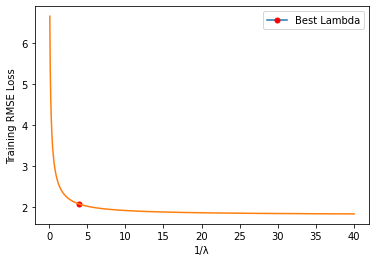

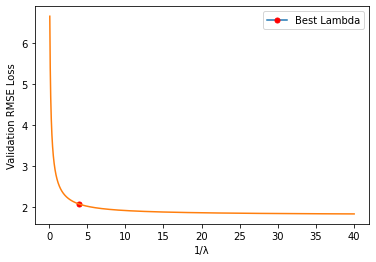

In [ ]:
# this cell is just to run the entire method above and generate the Results
bestLamL2 ()

Finding the best lamda for **MSE+lamda*L1(w)** loss function i.e. L1 loss function.

Plotting the training and validation RMSE vs. 1/lamda.

Printing weights, validation RMSE, validation NRMSE for the best lamda.

In [ ]:
def bestLamL1 ():

  # So that the global variables can be modified we need to declare them global.
  global err_L1
  global w_L1

  # So we are to find a particular λ
  # Before that we have to have a particular starting weights array it can be anything but has to be initialized.
  sh = X.shape
  w = np.random.randint(1,5,sh[1]) # Notice I avoided a 0 from  being a weight as it will cause an error if present

  # Adding that bias temrm by adding a coloumn of 1s
  w = np.append(w,1)

  # These lists are to plot the required graphs
  lamInv = []  # Complexity
  tr_loss = [] # Training loss
  val_loss = []# Validation loss

  # I am using the same values as used to verify the gradient descent function's correctness
  epsilon = 1e-10
  max_iter = 100
  lr = 1e-5

  # I have observed that generally the error changes very less for higher values of complexity
  # Thus I am considering plotting for complexities in the range of 0.1 to 40 as it captures the required parts
  lamda = 10.0

  # I am running the values of lambda in reverse so that the curve is plotted in increasing order of complexity
  while (lamda >= 0.025):

    # The gradient descent method gives the losses directly so using that
    resultsL2 = Gradient_Descent (X, X_val, t, t_val, w, lamda, max_iter, epsilon, lr, L1_Loss,L1_Gradient)

    # Appending the losses to the respective lists
    tr_loss = np.append(tr_loss,resultsL2[1])
    val_loss = np.append(val_loss,resultsL2[2])
    lamInv = np.append(lamInv,(1/lamda))
    lamda = lamda - 0.001

  # Converting all the MSE losses to RMSE losses
  tr_loss = np.sqrt(tr_loss)
  val_loss = np.sqrt(val_loss)

  # Now where to stop as the lowest value is better and better for increasing complexity
  # Thus if the value is within 5% of its decay we are selecting that value
  min_lim = min(val_loss)
  max_lim = max(val_loss)

  # tolerance stores the value at which we get the best lambda
  tolerance = 0.05* (max_lim - min_lim) + min_lim

  # c serves as the element index in the respective lists, to locate the best lambda
  c = 0

  # So now we go through the validation losses and select the first lambda that indicates the 95% decay of the loss
  for i in val_loss :
    if (i <= tolerance):
      break
    c = c + 1

  # So the best lambda is found out by inverting the complexiy (in lamInv list) at index c
  best_lamda = 1/lamInv[c]

  # Using the gradient descent function one last time to get the best set of weights
  # Now displaying them
  finalL1 = Gradient_Descent (X, X_val, t, t_val, w, best_lamda, max_iter, epsilon, lr, L1_Loss,L1_Gradient)
  print ("Best Lamda ", str(best_lamda))
  print()
  print ("Weights ", str(finalL1[0]))
  print()
  print ("Validation RMSE Loss ", str(val_loss[c]))
  print()
  print ("Validation NRMSE Loss ", str(finalL1[3]))

  #storing the comparison parameters
  err_L1 = finalL1[3]
  w_L1 = finalL1[0]

  # Plotting the graphs with a mark on the best lambda
  plt.plot(lamInv[c], tr_loss[c], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red",label="Best Lambda")
  plt.plot (lamInv,tr_loss)
  plt.xlabel("1/λ")
  plt.ylabel("Training RMSE Loss")
  plt.legend()
  plt.show()

  plt.plot(lamInv[c], val_loss[c], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red",label="Best Lambda")
  plt.plot (lamInv, val_loss)
  plt.xlabel("1/λ")
  plt.ylabel("Validation RMSE Loss")
  plt.legend()
  plt.show()

Best Lamda  0.1350000000001027

Weights  [ 0.42270774  0.23347993  0.76646569 -0.34176138  1.03485313 -0.72970751
 -0.23398165  0.06077622 -0.33141927  0.49362434 -0.44928896 -0.14848703
  0.06357888 -0.07608411  0.01946544  0.09994237 -0.04609733 -0.01133291
  0.11760808 -0.08363946  0.10887909  0.00538544]

Validation RMSE Loss  1.119941150726551

Validation NRMSE Loss  0.6860323881007023


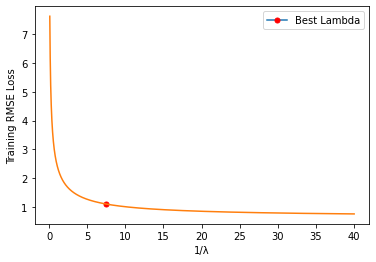

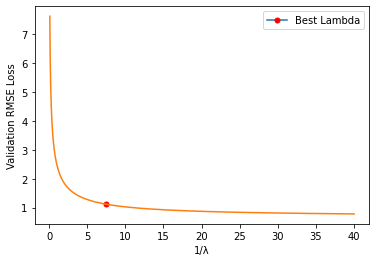

In [ ]:
# this cell is just to run the entire method above and generate the Results
bestLamL1()

Finding the best lamda for **pseudo-inv method**.

Plotting the training and validation RMSE vs. 1/lamda.

Printing weights, validation RMSE, validation NRMSE for the best lamda.


In [ ]:
def bestLamPI ():

  # So that the global variables can be modified we need to declare them global.
  global err_PI
  global w_PI

  # So we are to find a particular λ
  # Before that we have to have a particular starting weights array it can be anything but has to be initialized.
  sh = X.shape
  w = np.random.randint(-5,5,sh[1])

  # Adding that bias temrm by adding a coloumn of 1s
  w = np.append(w,1)

  # These lists are to plot the required graphs
  lamInv = []  # Complexity
  tr_loss = [] # Training loss
  val_loss = []# Validation loss

  # I am using the same values as used to verify the gradient descent function's correctness
  epsilon = 1e-10
  max_iter = 100
  lr = 1e-5

  # Here too its observed that generally the error changes very less for higher values of complexity
  # Thus I am considering plotting for complexities in the range of 0.002 to 10 as it captures the required part
  lamda = 500.0

  # I am running the values of lambda in reverse so that the curve is plotted in increasing order of complexity
  while (lamda >= 1.0):
    # Now in pseudo inverse method we dont need the gradient and related stuff.
    # We can find the w by usig Pseudo Inverse function.
    w_new = Pseudo_Inverse (X, t, lamda)

    # Then using that we calculate the losses (MSE)
    tr_loss = np.append(tr_loss, MSE_Loss (X, t, w_new, lamda))
    val_loss = np.append(val_loss, MSE_Loss (X_val, t_val, w_new, lamda))
    lamInv = np.append(lamInv,(1/lamda))
    lamda = lamda - 0.01

  # Converting all the MSE losses to RMSE losses
  tr_loss = np.sqrt(tr_loss)
  val_loss = np.sqrt(val_loss)

  # In this method I am taking one precaution, sometimes the validation graph ight take a v shape
  # So for that I am keeping an extra condition of stoppage from the training curve as well
  # Now where to stop as the lowest value is better and better for increasing complexity
  # Thus if the value is within 3% of its decay we are selecting that value
  min_lim1 = min(val_loss)
  max_lim1 = max(val_loss)

  min_lim2 = min(tr_loss)
  max_lim2 = max(tr_loss)

  # tolerance stores the value at which we get the best lambda
  tolerance1 = 0.03* (max_lim1 - min_lim1) + min_lim1
  tolerance2 = 0.03* (max_lim2 - min_lim2) + min_lim2

  # c serves as the element index in the respective lists, to locate the best lambda
  c = 0

  # So now we go through the validation losses and select the first lambda that indicates the 95% decay of the loss
  while c <= len(tr_loss) :
    if (val_loss[c] <= tolerance1)and(tr_loss[c] <= tolerance2):
      break
    c = c + 1

  # So the best lambda is found out by inverting the complexiy (in lamInv list) at index c
  best_lamda = 1/lamInv[c]

  # Getting the best w corrosponding to the best value of lambda
  w_new = Pseudo_Inverse (X, t, best_lamda)

  #storing the comparison parameters
  err_PI = NRMSE_Metric (X_val, t_val, w_new, best_lamda)
  w_PI = w_new

  # Thus all that's left is to display the values
  print ("Best Lamda ", str(best_lamda))
  print()
  print ("Weights ", str(w_new))
  print()
  print ("Validation RMSE Loss ", str(mt.sqrt(MSE_Loss (X_val, t_val, w_new, best_lamda))))
  print()
  print ("Validation NRMSE Loss ", str(err_PI))
  print()


  #plotting the results with markers on the best lambda
  plt.plot(lamInv[c], tr_loss[c], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red", label ="Best λ")
  plt.plot (lamInv,tr_loss)
  plt.xlabel("1/λ")
  plt.ylabel("Training RMSE Loss")
  plt.legend()
  plt.show()

  plt.plot(lamInv[c], val_loss[c], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red", label ="Best λ" )
  plt.plot (lamInv, val_loss)
  plt.xlabel("1/λ")
  plt.ylabel("Validation RMSE Loss")
  plt.legend()
  plt.show()

In [ ]:
# this cell is just to run the entire method above and generate the Results
bestLamPI()

**Conclusion**

Time taken by the L2 method of regression method is: ~ 14 - 15 min

Time taken by the L1 method of regression method is: ~ 13 - 14 min

Time taken by the Pseudo Inverse method is: ~ 1 - 2 min

The plots of L2 loss and L1 loss model have a good learning rate whereas the Pseudo Inverse model for the same learning rate settles rapidly. But, it is ok-ish and the metrics perform good enough give values close to predicted (but not matching, proving no overfitting).  

In [ ]:
print ("The best model thus is :")
print ("The MSE+lamda*L2(w) based model's NRMSE is :",str(err_L2))
print ("The MSE+lamda*L2(w) based model's NRMSE is :",str(err_L1))
print ("The MSE+lamda*L2(w) based model's NRMSE is :",str(err_PI))
print ()
# So simply comparing the NRMSE errors and selecting the one with the lowest value to select the best model
if (err_L2 <= err_L1) and (err_L2 <= err_PI):
   print ("MSE+lamda*L2(w) Gradient Descent is the Best Model")
   bestModel_w = w_L2
elif (err_L1 <= err_L2) and (err_L1 <= err_PI):
   print ("MSE+lamda*L1(w) Gradient Descent is the Best Model")
   bestModel_w = w_L1
else:
   print ("Pseudo Inverse method is the Best Model")
   bestModel_w = w_PI

Plotting a Line plot for the best model of prediction. Which in my case is for the case of Pseudo Inverse model. Its the fastest of the three and produces the lowest error for a give dataset.

I will be taking the best lambda and the weights matrix directly and use it to produce a line plot to compare how good is the prediction in comparison to the actual value.

In [ ]:
predicted_y = Prediction(X_val, bestModel_w)

# Now calulating the R^2 value of best model
mean_t = np.mean(t_val)

# The R^2 is given by ( Σ(Ypred - Ymean)^2 / Σ(Yactual - Ymean)^2 )
numerator = np.sum(np.square(predicted_y - mean_t)) #The numerator
denominator = np.sum(np.square(t_val - mean_t))     #The denominator
R_squared = numerator/denominator
print ("R^2 parameter of the best model is: "+str(R_squared))
print ()

# We are comparing the actual and predicted on the validation set using a line graph for 15 random data outputs
print ("The Actual vs predicted Model for a random 15 sets of inputs are:")
x_coor = [*range(1, 16, 1)]      # * helps us extract the elements of the range into an array
pred_y_plot = predicted_y [1:16] # 15 values of Prediction
val_y_plot  = t_val[1:16]        # The corrosponding 15 values actually

plt.plot(x_coor, pred_y_plot, color='red',label="Prediction value")
plt.plot(x_coor, val_y_plot, color='blue',label="Actual value")
plt.xlabel("Sample Number")
plt.ylabel("Normalized Value of the quantity")
plt.legend()
plt.show()

Now we are going to predict an output based on the dataset in the link: https://www.ee.iitb.ac.in/~asethi/Dump/TempTest.csv

Using the methods which has performed the best.

In [ ]:
url_path2 =  "https://www.ee.iitb.ac.in/~asethi/Dump/TempTest.csv"
df2 = pd.read_csv( url_path2 ) # reading data into a dataframe
X_test = df2.to_numpy()        # converting the data into a numpy matrix
prediction = Prediction(X_test, bestModel_w) #Using the best model weights from above to predict the values

# Converting the array into dataframe
df_out = pd.DataFrame(prediction)

# save the dataframe as a csv file
#df_out.to_csv("213230011_213350005_1.csv")




#**... Part 2 ends.**

1. Write the name or roll no.s of friends from outside your group with whom you discussed the assignment here (no penalty for mere discussion without copying code):

- I discussed a few areas of doubts with a friend Yashwant Nandi : 21335T002
- I would like to thank the TAs who guided me.

2. Write the links of sources on the internet referred here (no penalty for mere consultation without copying code):

I reffered to the net mainly for the concepts and formulas but coding part is mostly my part, since I experimented with things like the tolerance for final or most preffered lambda value and so on, most of the code was according to the instructions and referrring to the package defined functions. Here are some of the websites to which I reffered to get formulas and understand algorithms.
- https://www.geeksforgeeks.org/
- https://www.w3schools.com/
- https://stackoverflow.com/
- https://numpy.org/doc/stable/index.html